### IMPORTANT !!! Please read before you clear the output & run all cells!!!!!!!

Because this dataset is constantly changing, if use 'wget' statement, the results could be different with what we demonstrate in the markdown cell and some errors may occur due to the dataset change.

Also, wired thing is, one of these table 'businesses.csv' has encoding issue which could not be successfully run the csvkit 'csvstat' and sql 'insert into' statement. After we use Excel to change the encoding type, it works. 

So, we suggest you to use the files we uploaded. We are so sorry for the inconvenience.

Thank you very much!

# PROJECT 4  :  Restaurant Inspection of Los Angeles County, 2015-2017

### By Weihang Wen, Ruixi Liu, Mengchen Xiao, Mingqi Liu

## Part 1 - Data Selection

**data description: ** We choose to analyse the Environmental Health Inspection Results of restaurants in Los Angeles County from June 2015 to December 2017. This dataset contains the business information of each restaurant, inspection score as well as violation code of every inspection, and the grading criteria. 

**source: ** We found our dataset at US Cities Open Census website. Here is the *link*: http://us-city.census.okfn.org/entry/losangeles/food-safety

**why this data:** Needless to say, all four of us like eating and exploring fancy restaurants. Initially, we are curious about whether restaurants we always go meet the standard that harmless to customers' health. Unfortunately, DC and VA's restaurant inspection data is incomplete. So we choose LA County to analyse. What's more, with the analysis, we can inform the public and generate some elementary suggestions to the regulators and people who set up the rules.

First of all, let's get the sql ready and obtain the data.

In [1]:
%load_ext sql

In [2]:
!dropdb -U student project_4

dropdb: database removal failed: ERROR:  database "project_4" is being accessed by other users
DETAIL:  There is 1 other session using the database.


In [3]:
!createdb -U student project_4

createdb: database creation failed: ERROR:  database "project_4" already exists


In [4]:
%sql postgresql://student@/project_4

'Connected: student@project_4'

In [5]:
#!wget -O q1.zip http://ehservices.publichealth.lacounty.gov/LIVES/LABusinesses.zip

The above is the original source of data, which we are not going to use here.

In [8]:
!unzip -o LABusinesses.zip

Archive:  LABusinesses.zip
  inflating: businesses.csv          
  inflating: feed_info.csv           
  inflating: inspections.csv         
  inflating: legend.csv              
  inflating: violations.csv          


**initial exploration:**

As you can see, there are five csv files in this zip file. Let's take a look into these files.

In [11]:
!head -3 businesses2.csv | csvlook

|--------------+------------------------+-------------------+----------+-------+-------------+-------------+--------------+---------------|
|  business_id | name                   | address           | city     | state | postal_code | latitude    | longitude    | phone_number  |
|--------------+------------------------+-------------------+----------+-------+-------------+-------------+--------------+---------------|
|  PR0000206   | JOSYLN SENIOR CENTER   | 210 N CHAPEL AVE  | ALHAMBRA | CA    | 91801       | 34.09852551 | -118.124767  | 626-960-2995  |
|  PR0000213   | STARBUCKS COFFEE #9685 | 145 N CITRUS AVE  | COVINA   | CA    | 91723       | 34.08732692 | -117.8904602 |               |
|--------------+------------------------+-------------------+----------+-------+-------------+-------------+--------------+---------------|


In [12]:
!head -3 feed_info.csv | csvlook

|------------+--------------+----------------------------------------------------------------+--------------------------------------+-------------------------|
|  feed_date | feed_version | municipality_name                                              | municipality_url                     | contact_email           |
|------------+--------------+----------------------------------------------------------------+--------------------------------------+-------------------------|
|  20171207  | 1.0          | Los Angeles County Public Health Environmental Health Division | http://publichealth.lacounty.gov/eh/ | ehmail@ph.lacounty.gov  |
|------------+--------------+----------------------------------------------------------------+--------------------------------------+-------------------------|


In [13]:
!head -3 inspections.csv | csvlook

|--------------+-------+----------+-------------+----------|
|  business_id | score | date     | description | type     |
|--------------+-------+----------+-------------+----------|
|  PR0014182   | 95    | 20170207 |             | Routine  |
|  PR0005730   | 99    | 20161216 |             | Routine  |
|--------------+-------+----------+-------------+----------|


In [14]:
!head -3 violations.csv | csvlook

|--------------+----------+------+-------------------------------------------------------------------------------|
|  business_id | date     | code | description                                                                   |
|--------------+----------+------+-------------------------------------------------------------------------------|
|  PR0005705   | 20150608 | F040 | Standard Not Met: Plumbing: Plumbing in good repair, proper backflow devices  |
|  PR0008515   | 20150609 | F052 | Standard Not Met: Food safety certification                                   |
|--------------+----------+------+-------------------------------------------------------------------------------|


In [15]:
!head -5 legend.csv | csvlook

|----------------+---------------+--------------|
|  minimum_score | maximum_score | description  |
|----------------+---------------+--------------|
|  70            | 79            | C            |
|  80            | 89            | B            |
|  90            | 100           | A            |
|----------------+---------------+--------------|


Obviously, feed_info.csv contains the data version and its provider. In our analysis, this file is not useful. So the rest of our report is based on businesses, violations, inspections and legend table.

Then, let's find out whether our data has the issue of missing value.

In [16]:
!csvstat inspections.csv

  1. business_id
	<class 'str'>
	Nulls: False
	Unique values: 28378
	5 most frequent values:
		PR0016342:	11
		PR0028988:	10
		PR0024729:	10
		PR0153185:	10
		PR0028810:	10
	Max length: 9
  2. score
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 100
	Sum: 12941196
	Mean: 93.49899573730222
	Median: 94.0
	Standard Deviation: 3.8475935732917934
	Unique values: 44
	5 most frequent values:
		90:	19452
		95:	14712
		96:	14603
		94:	14444
		93:	13307
  3. date
	<class 'int'>
	Nulls: False
	Min: 20150608
	Max: 20171206
	Sum: 2790726769826
	Mean: 20162753.918257352
	Median: 20160928.0
	Standard Deviation: 7352.171720661275
	Unique values: 737
	5 most frequent values:
		20161213:	417
		20161206:	406
		20160810:	397
		20170207:	395
		20171107:	394
  4. description
	<class 'NoneType'>
	Nulls: True
	Values: 
  5. type
	<class 'str'>
	Nulls: False
	Values: Routine

Row count: 138410


In [17]:
!csvstat violations.csv

  1. business_id
	<class 'str'>
	Nulls: False
	Unique values: 28284
	5 most frequent values:
		PR0023798:	119
		PR0170854:	117
		PR0016555:	114
		PR0151223:	105
		PR0161072:	103
	Max length: 9
  2. date
	<class 'int'>
	Nulls: False
	Min: 20150608
	Max: 20171206
	Sum: 13517902907282
	Mean: 20162733.29049878
	Median: 20160928.0
	Standard Deviation: 7397.702403910342
	Unique values: 736
	5 most frequent values:
		20171107:	2044
		20161206:	2041
		20161213:	1963
		20160809:	1928
		20171108:	1926
  3. code
	<class 'str'>
	Nulls: False
	Unique values: 87
	5 most frequent values:
		F033:	73691
		F044:	73279
		F035:	60793
		F036:	39665
		F037:	37607
	Max length: 4
  4. description
	<class 'str'>
	Nulls: False
	Unique values: 83
	5 most frequent values:
		Standard Not Met: Nonfood-contact surfaces clean and in good repair:	73691
		Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean:	73279
		Standard Not Met: Equipment/Utensils - approved; installed;

In [18]:
!csvstat businesses2.csv

  1. business_id
	<class 'str'>
	Nulls: False
	Unique values: 28771
	Max length: 9
  2. name
	<class 'str'>
	Nulls: False
	Unique values: 24116
	5 most frequent values:
		SUBWAY:	122
		STARBUCKS:	71
		DOMINO'S PIZZA:	60
		WABA GRILL:	58
		THE COFFEE BEAN & TEA LEAF:	58
	Max length: 69
  3. address
	<class 'str'>
	Nulls: False
	Unique values: 26445
	5 most frequent values:
		1000 VIN SCULLY AVE:	69
		3911 S FIGUEROA ST:	44
		1111 S FIGUEROA ST:	43
		285 W HUNTINGTON DR:	40
		26101 MAGIC MOUNTAIN PKWY:	32
	Max length: 42
  4. city
	<class 'str'>
	Nulls: False
	Unique values: 169
	5 most frequent values:
		LOS ANGELES:	8197
		SANTA MONICA:	660
		TORRANCE:	657
		GLENDALE:	572
		BURBANK:	480
	Max length: 22
  5. state
	<class 'str'>
	Nulls: False
	Values: CA, ca
  6. postal_code
	<class 'str'>
	Nulls: False
	Unique values: 2239
	5 most frequent values:
		90012:	369
		90028:	355
		90045:	329
		91748:	328
		90015:	299
	Max length: 10
  7. latitude
	<class 'float'>
	Nulls: True
	Min: -38.02572

In total, the inspections file has a column named description which doesn't contain any value. Also, the type of inspection is all 'Routine'. In the businesses file, all the value in state is 'CA' or 'ca' and phone_number column contains a lot of missing value. Everything in violations table seems to be good in this stage of exploration.

From the column of each table, we found score and violation code are worth to investigate. With identical business_id and the date of inspection, we can easily associate the table businesses and violations with table inspections. Through that, we could find some geographic clues, score fluctuation and distribution or the most noticable health standards of restaurant, etc.

**questions: **
* What is the most frequently be violated standard ?
* Can the pattern of score change from 2015-2017 be found in this dataset?
* How is the score distributed?
* Do some of the violation codes are appeared constantly for some restaurants? What is the overall percentage?
* Which city has the highest average score and which has the lowest? What is the average level of the whole LA County?
* Does the score has some relationship with local real estate price?(as bonus)

**concerns and challenges:** 

* The dataset is constantly changing. So we are worry about if using 'wget' statement everytime, the result of analysis could be different from the most latest version of data.
* We are wondering whether this dataset have some type-in error. For instance, when the inspection score is 100(full credit), the violations table should contain none record of this business in that inspection date but the actual situation is not. In contrast, we also need to find out some restaurant who get lower than 100 but don't have violation code records in the violations table.
* Whether the violation code and its discription is one-to-one corresponding.
* We also want to know do the inspections table contains some businesses that don't included in the businesses table. For the opposite situation, we think it is not a issue. Maybe that restaurant has not been inspected yet.
* If at the same inspection date, same restaurant has multiple scores, what operation should we take to address it.

Those are what we hypothesize that we may encounter in the further study. That's cool if we don't. The way we find out and handle these concerns and challenges will be specifically demonstrated in the data wrangling section.

**That's all for data selection.**

## Part 2 - Data Wrangling

To start with, we import these csv files into the tables we created.

First, we created "businesses" table and tried to import “businesses.csv”. However, we realized that there is an encoding problem (utf-8 codec cannot be decode) with only the “businesses.csv”. After researching online and consulting Professor Wang, we think that the most realistic way to solve this problem is to change the encoding directly in excel and re-upload a separate csv file named as “businesses2.csv”. For the following analysis, we would be using “businesses2.csv”. The dataset would be the exactly same as the original one, except the encoding.

In [21]:
!head -n 100 businesses2.csv | csvstat

  1. business_id
	<class 'str'>
	Nulls: False
	Unique values: 99
	Max length: 9
  2. name
	<class 'str'>
	Nulls: False
	Unique values: 94
	5 most frequent values:
		EDIBLE ARRANGEMENTS:	4
		STARBUCKS COFFEE CO:	2
		STARBUCKS:	2
		THE REFINERY:	1
		RALPHS #166 STARBUCKS:	1
	Max length: 38
  3. address
	<class 'str'>
	Nulls: False
	Unique values: 97
	5 most frequent values:
		111 RAGING WATERS DR:	2
		285 W HUNTINGTON DR:	2
		10143 S ATLANTIC AVE:	1
		18400 AVALON BLVD STE 300:	1
		16280 S PARAMOUNT BLVD STE C:	1
	Max length: 34
  4. city
	<class 'str'>
	Nulls: False
	Unique values: 46
	5 most frequent values:
		LOS ANGELES:	29
		SANTA MONICA:	8
		SAN DIMAS:	3
		TORRANCE:	3
		ARCADIA:	3
	Max length: 22
  5. state
	<class 'str'>
	Nulls: False
	Values: CA
  6. postal_code
	<class 'str'>
	Nulls: False
	Unique values: 74
	5 most frequent values:
		91007:	3
		90403:	3
		90024:	3
		90049:	3
		90027:	2
	Max length: 10
  7. latitude
	<class 'float'>
	Nulls: False
	Min: 33.73431161
	Max: 34.44756

Based on these values, We expect the "businesses" table with the followig values.

In [22]:
%%sql
DROP TABLE IF EXISTS businesses;

CREATE TABLE businesses (
    business_id VARCHAR(20) NOT NULL,
    name VARCHAR(100) NOT NULL,
    address VARCHAR(100) NOT NULL,
    city VARCHAR(100) NOT NULL,
    state VARCHAR(10) NOT NULL,
    postal_code VARCHAR(100) NOT NULL,
    latitude NUMERIC,
    longitude NUMERIC,
    phone_number VARCHAR(100)
);

Done.
Done.


[]

Now we'll load the data directly using `COPY` command.  

In [25]:
!cp businesses2.csv /tmp/businesses2.csv

In [27]:
%%sql
COPY businesses FROM '/tmp/businesses2.csv'
CSV
HEADER;

28771 rows affected.


[]

In [28]:
%%sql
SELECT COUNT(*) FROM businesses;

1 rows affected.


count
28771


The following step is to verify that all data has been imported into the "businesses" table. 

In [31]:
!xsv count businesses2.csv

28771


In [32]:
%%sql
SELECT * FROM businesses
LIMIT 10

10 rows affected.


business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
PR0000206,JOSYLN SENIOR CENTER,210 N CHAPEL AVE,ALHAMBRA,CA,91801,34.09852551,-118.124767,626-960-2995
PR0000213,STARBUCKS COFFEE #9685,145 N CITRUS AVE,COVINA,CA,91723,34.08732692,-117.8904602,None
PR0000250,VFW POST NO. 6110,16555 SIERRA HWY,CANYON COUNTRY,CA,91351-1338,34.44756653,-118.4262071,661-252-9989
PR0000273,STABUCKS @ VONS #2066,18439 VENTURA BLVD,TARZANA,CA,91356,34.16838141,-118.53457,None
PR0000278,COCOHODO TORRANCE,2734 SEPULVEDA BLVD,TORRANCE,CA,90505,33.82248757,-118.3331782,310-530-3875
PR0000307,KING'S BAKERY,127 N GARFIELD AVE STE J,MONTEREY PARK,CA,91754,34.06332786,-118.123686,None
PR0000332,PAPA JOHN'S 2247,5457 E SOUTH ST,LAKEWOOD,CA,90712,33.86073276,-118.1260192,562-925-5856
PR0000335,4 SEASONS HOTEL-THE BAR,2 DOLE DR,WESTLAKE VILLAGE,CA,91362,34.15136847,-118.8045058,None
PR0000380,BENNYS 19TH HOLE SALOON,16829 PRAIRIE AVE,LAWNDALE,CA,90260,33.87795215,-118.3439873,None
PR0000462,TERRACE CINEMAS 6,28901 S WESTERN AVE,RANCHO PALOS VERDES,CA,90275,33.75635356,-118.3103982,310-831-1919


The following step is to drop columns that do not have useful information to our analysis.

In [33]:
%%sql
ALTER TABLE businesses
DROP COLUMN state,
DROP COLUMN phone_number;

Done.


[]

In [34]:
%%sql
SELECT * FROM businesses
LIMIT 10

10 rows affected.


business_id,name,address,city,postal_code,latitude,longitude
PR0000206,JOSYLN SENIOR CENTER,210 N CHAPEL AVE,ALHAMBRA,91801,34.09852551,-118.124767
PR0000213,STARBUCKS COFFEE #9685,145 N CITRUS AVE,COVINA,91723,34.08732692,-117.8904602
PR0000250,VFW POST NO. 6110,16555 SIERRA HWY,CANYON COUNTRY,91351-1338,34.44756653,-118.4262071
PR0000273,STABUCKS @ VONS #2066,18439 VENTURA BLVD,TARZANA,91356,34.16838141,-118.53457
PR0000278,COCOHODO TORRANCE,2734 SEPULVEDA BLVD,TORRANCE,90505,33.82248757,-118.3331782
PR0000307,KING'S BAKERY,127 N GARFIELD AVE STE J,MONTEREY PARK,91754,34.06332786,-118.123686
PR0000332,PAPA JOHN'S 2247,5457 E SOUTH ST,LAKEWOOD,90712,33.86073276,-118.1260192
PR0000335,4 SEASONS HOTEL-THE BAR,2 DOLE DR,WESTLAKE VILLAGE,91362,34.15136847,-118.8045058
PR0000380,BENNYS 19TH HOLE SALOON,16829 PRAIRIE AVE,LAWNDALE,90260,33.87795215,-118.3439873
PR0000462,TERRACE CINEMAS 6,28901 S WESTERN AVE,RANCHO PALOS VERDES,90275,33.75635356,-118.3103982


Second, we create "inspections" table.

In [36]:
!head -n 100 inspections.csv | csvstat

  1. business_id
	<class 'str'>
	Nulls: False
	Unique values: 92
	5 most frequent values:
		PR0002000:	3
		PR0005769:	2
		PR0003877:	2
		PR0013583:	2
		PR0014182:	2
	Max length: 9
  2. score
	<class 'int'>
	Nulls: False
	Min: 82
	Max: 100
	Sum: 9499
	Mean: 95.94949494949495
	Median: 96
	Standard Deviation: 3.192079014027171
	Unique values: 12
	5 most frequent values:
		99:	15
		100:	12
		97:	12
		96:	11
		95:	10
  3. date
	<class 'int'>
	Nulls: False
	Min: 20150623
	Max: 20171128
	Sum: 1996126706
	Mean: 20162896.020202022
	Median: 20161018
	Standard Deviation: 7494.627996616825
	Unique values: 92
	5 most frequent values:
		20161007:	2
		20171128:	2
		20151007:	2
		20170503:	2
		20160325:	2
  4. description
	<class 'NoneType'>
	Nulls: True
	Values: 
  5. type
	<class 'str'>
	Nulls: False
	Values: Routine

Row count: 99


Based on these values, We expect the "inspections" table with the followig values.

In [37]:
%%sql
DROP TABLE IF EXISTS inspections;

CREATE TABLE inspections (
    business_id VARCHAR(20) NOT NULL,
    score INT NOT NULL,
    date DATE NOT NULL,
    description VARCHAR,
type1 VARCHAR(10) NOT NULL);

Done.
Done.


[]

Now we'll load the data directly using `COPY` command.  

In [38]:
!cp inspections.csv /tmp/inspections.csv

In [39]:
%%sql
COPY inspections FROM '/tmp/inspections.csv'
CSV
HEADER;

138410 rows affected.


[]

In [40]:
%%sql
SELECT COUNT(*) FROM inspections;

1 rows affected.


count
138410


The following step is to verify that all data has been imported into the "inspections" table. 

In [41]:
!xsv count inspections.csv

138410


In [42]:
%%sql
SELECT * FROM inspections
LIMIT 10

10 rows affected.


business_id,score,date,description,type1
PR0014182,95,2017-02-07,,Routine
PR0005730,99,2016-12-16,,Routine
PR0003877,96,2017-01-05,,Routine
PR0002710,92,2016-04-01,,Routine
PR0015938,95,2017-01-11,,Routine
PR0002248,100,2015-08-05,,Routine
PR0003383,99,2017-08-18,,Routine
PR0014634,98,2015-06-23,,Routine
PR0005552,96,2015-10-23,,Routine
PR0010531,100,2016-06-06,,Routine


The following step is to drop columns that do not have useful information to our analysis.

In [43]:
%%sql
ALTER TABLE inspections
DROP COLUMN type1,
DROP COLUMN description;

Done.


[]

In [44]:
%%sql
SELECT * FROM inspections
LIMIT 10

10 rows affected.


business_id,score,date
PR0014182,95,2017-02-07
PR0005730,99,2016-12-16
PR0003877,96,2017-01-05
PR0002710,92,2016-04-01
PR0015938,95,2017-01-11
PR0002248,100,2015-08-05
PR0003383,99,2017-08-18
PR0014634,98,2015-06-23
PR0005552,96,2015-10-23
PR0010531,100,2016-06-06


Third, we create "violations" table.

In [45]:
!head -n 100 violations.csv | csvstat

  1. business_id
	<class 'str'>
	Nulls: False
	Unique values: 34
	5 most frequent values:
		PR0014954:	6
		PR0011662:	6
		PR0013208:	5
		PR0010207:	5
		PR0010538:	5
	Max length: 9
  2. date
	<class 'int'>
	Nulls: False
	Min: 20150608
	Max: 20150630
	Sum: 1994911503
	Mean: 20150621.242424242
	Median: 20150623
	Standard Deviation: 6.226516948902309
	Unique values: 15
	5 most frequent values:
		20150618:	15
		20150624:	15
		20150609:	13
		20150622:	8
		20150625:	8
  3. code
	<class 'str'>
	Nulls: False
	Unique values: 24
	5 most frequent values:
		F044:	17
		F033:	14
		F040:	6
		F037:	6
		F035:	6
	Max length: 4
  4. description
	<class 'str'>
	Nulls: False
	Unique values: 24
	5 most frequent values:
		Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean:	17
		Standard Not Met: Nonfood-contact surfaces clean and in good repair:	14
		Standard Not Met: Equipment/Utensils - approved; installed; clean; good repair, capacity:	6
		Standard Not Met: Ad

Based on these values, We expect the "violations" table with the followig values.

In [46]:
%%sql
DROP TABLE IF EXISTS violations;

CREATE TABLE violations (
    business_id VARCHAR(20) NOT NULL,
    date DATE NOT NULL,
    code VARCHAR(10) NOT NULL,
    description VARCHAR NOT NULL
);

Done.
Done.


[]

Now we'll load the data directly using `COPY` command.  

In [47]:
!cp violations.csv /tmp/violations.csv

In [48]:
%%sql
COPY violations FROM '/tmp/violations.csv'
CSV
HEADER;

670440 rows affected.


[]

In [49]:
%%sql
SELECT COUNT(*) FROM violations;

1 rows affected.


count
670440


The following step is to verify that all data has been imported into the "violations" table. 

In [50]:
!xsv count violations.csv

670440


In [51]:
%%sql
SELECT * FROM violations
LIMIT 10

10 rows affected.


business_id,date,code,description
PR0005705,2015-06-08,F040,"Standard Not Met: Plumbing: Plumbing in good repair, proper backflow devices"
PR0008515,2015-06-09,F052,Standard Not Met: Food safety certification
PR0011662,2015-06-09,F044,"Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean"
PR0011662,2015-06-09,F040,"Standard Not Met: Plumbing: Plumbing in good repair, proper backflow devices"
PR0011662,2015-06-09,F050,Standard Not Met: Permit Suspension
PR0011662,2015-06-09,F023,"Standard Not Met: No rodents, insects, birds, or animals"
PR0011662,2015-06-09,F006,Standard Not Met: Adequate handwashing facilities supplied & accessible
PR0011662,2015-06-09,F014,Standard Not Met: Food contact surfaces: clean and sanitized
PR0002788,2015-06-09,F006,Standard Not Met: Adequate handwashing facilities supplied & accessible
PR0002788,2015-06-09,F039,Standard Not Met: Wiping cloths: properly used and stored


# Part 2 Wrangling

First, after browsing the dataset, we realized that for “inspections” table, there are different scores for the same restaurant on the same date. In order to solve this problem, we create a new table “inspections_clean” with the average score for the same restaurant on the same date.

In [52]:
%%sql
DROP TABLE IF EXISTS inspections_clean;

CREATE TABLE inspections_clean (
    business_id VARCHAR(20) NOT NULL,
    date DATE NOT NULL,
    avg_score INT NOT NULL);

Done.
Done.


[]

In [53]:
%%sql
INSERT INTO inspections_clean
SELECT business_id, date, AVG (score) AS avg_score
FROM inspections
GROUP BY business_id, date

138299 rows affected.


[]

In [54]:
%%sql
SELECT *
FROM inspections_clean
LIMIT 10; 

10 rows affected.


business_id,date,avg_score
PR0026143,2017-08-16,91
PR0044074,2016-06-30,98
PR0170361,2017-03-07,92
PR0157388,2015-11-12,97
PR0032337,2015-10-29,85
PR0176932,2017-09-12,93
PR0180865,2016-07-20,90
PR0022927,2016-01-11,94
PR0021106,2015-10-22,94
PR0148608,2016-08-10,94


The following step is to verify that there is only one score for each restaurant on each inspection date. 

In [55]:
%%sql
SELECT business_id, date, count(*) AS COUNT
FROM inspections_clean
GROUP BY business_id, date
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


business_id,date,count
PR0044074,2016-06-30,1
PR0170361,2017-03-07,1
PR0157388,2015-11-12,1
PR0032337,2015-10-29,1
PR0176932,2017-09-12,1
PR0180865,2016-07-20,1
PR0022927,2016-01-11,1
PR0021106,2015-10-22,1
PR0148608,2016-08-10,1
PR0026143,2017-08-16,1


Second, we add a new column "grade" on the "inspections_clean" table to define the average score by reference to the "legend.csv". 

In [56]:
%%sql
ALTER TABLE inspections_clean
ADD grade VARCHAR(5);

UPDATE inspections_clean
SET grade = 'A'
WHERE avg_score>=90;

UPDATE inspections_clean
SET grade = 'B'
WHERE avg_score<=89
AND avg_score>=80;

UPDATE inspections_clean
SET grade = 'C'
WHERE avg_score<=79
AND avg_score>=70;

UPDATE inspections_clean
SET grade = 'F'
WHERE avg_score<=69; 

Done.
130785 rows affected.
6995 rows affected.
490 rows affected.
29 rows affected.


[]

In [57]:
%%sql
SELECT *
FROM inspections_clean
LIMIT 10; 

10 rows affected.


business_id,date,avg_score,grade
PR0032337,2015-10-29,85,B
PR0017201,2017-10-12,81,B
PR0022192,2017-05-12,86,B
PR0040430,2017-06-28,86,B
PR0172424,2017-06-21,85,B
PR0036788,2016-06-14,82,B
PR0029279,2015-10-09,82,B
PR0016519,2015-07-02,84,B
PR0021510,2017-11-13,80,B
PR0003557,2016-05-19,86,B


Third, we found that there are restaurants which got 100 average score but still have violations in the “violations” table and restaurants which did not get 100 average score but did not have violations in the “violations” table. In order to avoid null value for the following analysis when joining tables, we decided to drop rows that have the above situations in the "inspections_clean" table. From the following results, we could see there are only 30 rows. Compared to the total large inspections, we think it won’t influence our result. 

In [58]:
%%sql
DROP TABLE IF EXISTS deletes;

CREATE TABLE deletes(
id VARCHAR(100),
date DATE)

Done.
Done.


[]

In [59]:
%%sql
INSERT INTO deletes
SELECT inspections_clean.business_id, inspections_clean.date
FROM inspections_clean
FULL JOIN violations
ON inspections_clean.business_id = violations.business_id
AND inspections_clean.date = violations.date
WHERE inspections_clean.avg_score = 100
AND violations.code IS NOT NULL
GROUP BY inspections_clean.business_id,inspections_clean.date
ORDER BY date

19 rows affected.


[]

In [60]:
%%sql
INSERT INTO deletes
SELECT inspections_clean.business_id, inspections_clean.date
FROM inspections_clean
FULL JOIN violations
ON inspections_clean.business_id = violations.business_id
AND inspections_clean.date = violations.date
WHERE inspections_clean.avg_score != 100
AND violations.code IS NULL
GROUP BY inspections_clean.business_id,inspections_clean.date
ORDER BY date

11 rows affected.


[]

In [61]:
%%sql
SELECT *
FROM deletes
ORDER BY id, date;

30 rows affected.


id,date
PR0002006,2017-11-03
PR0005240,2017-06-21
PR0005284,2016-06-21
PR0005284,2017-11-30
PR0005769,2017-06-23
PR0014860,2016-05-18
PR0022488,2016-10-03
PR0026191,2017-06-15
PR0027520,2015-08-20
PR0031937,2016-04-21


In [62]:
%%sql
DELETE FROM inspections_clean
USING deletes
WHERE inspections_clean.business_id = deletes.id
AND inspections_clean.date = deletes.date;

30 rows affected.


[]

The following code is to verify the updated result. 

In [63]:
%%sql
SELECT count(*)
FROM inspections_clean;

1 rows affected.


count
138269


In [64]:
%%sql
SELECT *
FROM inspections_clean
LIMIT 10;

10 rows affected.


business_id,date,avg_score,grade
PR0032337,2015-10-29,85,B
PR0017201,2017-10-12,81,B
PR0022192,2017-05-12,86,B
PR0040430,2017-06-28,86,B
PR0172424,2017-06-21,85,B
PR0036788,2016-06-14,82,B
PR0029279,2015-10-09,82,B
PR0016519,2015-07-02,84,B
PR0021510,2017-11-13,80,B
PR0003557,2016-05-19,86,B


Then, we create a new inspections table named as "inspections_facts" with the inspections key in order to create bridge, that we would talk more later. 

In [65]:
%%sql
DROP TABLE IF EXISTS inspections_facts;

CREATE TABLE inspections_facts (
    inspection_key SERIAL PRIMARY KEY,
    business_id VARCHAR(20) NOT NULL,
    date DATE NOT NULL,
    avg_score NUMERIC NOT NULL,
    grade CHAR(1) NOT NULL
);

Done.
Done.


[]

In [66]:
%%sql
INSERT INTO inspections_facts (business_id, date, avg_score, grade)
SELECT *
FROM inspections_clean;

138269 rows affected.


[]

In [67]:
%%sql
SELECT *
FROM inspections_facts
LIMIT 10;

10 rows affected.


inspection_key,business_id,date,avg_score,grade
1,PR0032337,2015-10-29,85,B
2,PR0017201,2017-10-12,81,B
3,PR0022192,2017-05-12,86,B
4,PR0040430,2017-06-28,86,B
5,PR0172424,2017-06-21,85,B
6,PR0036788,2016-06-14,82,B
7,PR0029279,2015-10-09,82,B
8,PR0016519,2015-07-02,84,B
9,PR0021510,2017-11-13,80,B
10,PR0003557,2016-05-19,86,B


Next, in order to link "businesses" table with "inspections_facts" table, we create another table named "business" with business key.

In [68]:
%%sql
DROP TABLE IF EXISTS business;

CREATE TABLE business (
    business_key SERIAL PRIMARY KEY,
    business_id VARCHAR(20) NOT NULL,
    name VARCHAR(100),
    address VARCHAR(100),
    city VARCHAR(100),
    postal_code VARCHAR(100),
    latitude NUMERIC,
    longitude NUMERIC
);

Done.
Done.


[]

In [69]:
%%sql
INSERT INTO business(business_id, name, address, city, postal_code, latitude, longitude)
SELECT *
FROM businesses;

28771 rows affected.


[]

In [70]:
%%sql
SELECT * FROM business
LIMIT 10

10 rows affected.


business_key,business_id,name,address,city,postal_code,latitude,longitude
1,PR0000206,JOSYLN SENIOR CENTER,210 N CHAPEL AVE,ALHAMBRA,91801,34.09852551,-118.124767
2,PR0000213,STARBUCKS COFFEE #9685,145 N CITRUS AVE,COVINA,91723,34.08732692,-117.8904602
3,PR0000250,VFW POST NO. 6110,16555 SIERRA HWY,CANYON COUNTRY,91351-1338,34.44756653,-118.4262071
4,PR0000273,STABUCKS @ VONS #2066,18439 VENTURA BLVD,TARZANA,91356,34.16838141,-118.53457
5,PR0000278,COCOHODO TORRANCE,2734 SEPULVEDA BLVD,TORRANCE,90505,33.82248757,-118.3331782
6,PR0000307,KING'S BAKERY,127 N GARFIELD AVE STE J,MONTEREY PARK,91754,34.06332786,-118.123686
7,PR0000332,PAPA JOHN'S 2247,5457 E SOUTH ST,LAKEWOOD,90712,33.86073276,-118.1260192
8,PR0000335,4 SEASONS HOTEL-THE BAR,2 DOLE DR,WESTLAKE VILLAGE,91362,34.15136847,-118.8045058
9,PR0000380,BENNYS 19TH HOLE SALOON,16829 PRAIRIE AVE,LAWNDALE,90260,33.87795215,-118.3439873
10,PR0000462,TERRACE CINEMAS 6,28901 S WESTERN AVE,RANCHO PALOS VERDES,90275,33.75635356,-118.3103982


Specially, we check whether some restaurants in the "inspections_facts" table are not included in the "business" table. The answer is yes.

In [71]:
%%sql
SELECT business_id
FROM inspections_facts
WHERE inspections_facts.business_id NOT IN (SELECT business_id FROM business)

0 rows affected.


business_id


In [72]:
%%sql
INSERT INTO business (business_id)
SELECT business_id
FROM inspections_facts
WHERE inspections_facts.business_id NOT IN (SELECT business_id FROM business);

0 rows affected.


[]

We then add a new identifiers (surrogate key) "business_key" back to the fact table.

In [74]:
%%sql
SELECT * FROM business
ORDER BY business_key DESC
LIMIT 4;

4 rows affected.


business_key,business_id,name,address,city,postal_code,latitude,longitude
28771,PR0201748,LODGE ROOM & CHECKER HALL,104 N AVENUE 56 2ND FL,LOS ANGELES,90042-4112,34.10908109,-118.1943762
28770,PR0201660,BREAKERS KOREAN BBQ,695 S VERMONT AVE # 110,LOS ANGELES,90005-1349,34.06010333,-118.2916652
28769,PR0201610,VEGAS BUFFET GLENDALE,110 S BRAND BLVD,GLENDALE,91204,34.14509892,-118.2548936
28768,PR0201380,CARSON BUFFET,888 E DOMINGUEZ ST STE E,CARSON,90746,33.84045281,-118.2602872


Now we update the `business_key` in the fact table with the values from "business" dimension table based on the "business_id".

In [75]:
%%sql
ALTER TABLE inspections_facts
ADD COLUMN business_key INTEGER,
ADD CONSTRAINT fk_id
    FOREIGN KEY (business_key)
    REFERENCES business (business_key);

Done.


[]

In [76]:
%%sql
UPDATE inspections_facts
SET business_key = business.business_key
FROM business
WHERE business.business_id = inspections_facts.business_id;

138269 rows affected.


[]

The following code is to verify that we updated all rows in the fact table.

In [77]:
%%sql
SELECT count(*) FROM inspections_facts;

1 rows affected.


count
138269


We would drop the unnecessary columns in the fact table later.

In [78]:
%%sql
SELECT * FROM inspections_facts
LIMIT 10;

10 rows affected.


inspection_key,business_id,date,avg_score,grade,business_key
1,PR0032337,2015-10-29,85,B,10736
2,PR0017201,2017-10-12,81,B,3473
3,PR0022192,2017-05-12,86,B,3898
4,PR0040430,2017-06-28,86,B,5351
5,PR0172424,2017-06-21,85,B,7170
6,PR0036788,2016-06-14,82,B,18853
7,PR0029279,2015-10-09,82,B,10536
8,PR0016519,2015-07-02,84,B,27470
9,PR0021510,2017-11-13,80,B,18018
10,PR0003557,2016-05-19,86,B,23051


As mentioned earlier, we found that there are restaurants which got 100 average score but still have violations in the “violations” table and restaurants which did not get 100 average score but did not have violations in the “violations” table.In order to avoid null value for the following analysis when joining tables, we decided to also drop rows that have the above situations in the "violations" table. From the following results, we could see there are only 30 rows for 19 types of violations. Compared to the total large violations, we think it won’t influence our result. 

In [79]:
%%sql
Select DISTINCT violations.business_id, violations.date 
FROM violations
JOIN deletes 
ON violations.business_id = deletes.id
AND violations.date = deletes.date;

19 rows affected.


business_id,date
PR0002006,2017-11-03
PR0005284,2016-06-21
PR0005284,2017-11-30
PR0005769,2017-06-23
PR0014860,2016-05-18
PR0022488,2016-10-03
PR0026191,2017-06-15
PR0032332,2017-02-17
PR0037754,2015-06-15
PR0040845,2015-10-26


In [80]:
%%sql
DELETE FROM violations
USING deletes
WHERE violations.business_id = deletes.id
AND violations.date = deletes.date;

30 rows affected.


[]

Also, after checking the total types of violations, we found that code "F021" actually has more than one description ("Standard Not Met: Hot and cold water available" and "Standard Not Met: Water available"). These two descriptions are almost the same. In order to be consistent, we update all "F021" into "Standard Not Met: Hot and cold water available".

In [81]:
%%sql
SELECT DISTINCT code, description 
FROM violations
ORDER BY code;

81 rows affected.


code,description
F001,Standard Not Met: Demonstration of knowledge
F002,"Standard Not Met: Communicable disease; reporting, restrictions & exclusions"
F003,"Standard Not Met: No discharge from eyes, nose, and mouth"
F004,"Standard Not Met: Proper eating, drinking, or tobacco use"
F005,Standard Not Met: Hands clean and properly washed; gloves used properly
F006,Standard Not Met: Adequate handwashing facilities supplied & accessible
F007,Standard Not Met: Proper hot and cold holding temperatures
F008,Standard Not Met: Time as a public health control; procedures & records
F009,Standard Not Met: Proper cooling methods
F010,Standard Not Met: Proper cooking time & temperatures


In [82]:
%%sql
UPDATE violations
SET description = 'Standard Not Met: Hot and cold water available'
WHERE code = 'F021';

4152 rows affected.


[]

The following code is to verify the above steps.

In [83]:
%%sql
SELECT * FROM violations
WHERE description = 'Standard Not Met: Water available';

0 rows affected.


business_id,date,code,description


Now we create a new dimension table "violation_type" to house the unique violation code and dscription. And we are going to treat "violations" table as a bridge, which we would talk later. 

In [84]:
%%sql
DROP TABLE IF EXISTS violation_type;

CREATE TABLE violation_type (
    key SERIAL PRIMARY KEY,
    code CHAR(4) NOT NULL,
    description VARCHAR(200) NOT NULL
);

Done.
Done.


[]

In [85]:
%%sql
INSERT INTO violation_type (code, description)
SELECT DISTINCT code, description 
FROM violations;

80 rows affected.


[]

In [86]:
%%sql
SELECT *
FROM violation_type
LIMIT 10;

10 rows affected.


key,code,description
1,F021,Standard Not Met: Hot and cold water available
2,F031,Standard Not Met: Consumer self service facilities properly constructed and maintained
3,F028,Standard Not Met: Fruits and vegetables washed as required
4,WP53,Standard Not Met: Wiping Cloths - Clean / Adequate Sanitizer /Turbid / Storage
5,WP34,Standard Not Met: Soap / Drying Device - Dispenser Filled / Repair / Approved Type / Clean
6,F035,"Standard Not Met: Equipment/Utensils - approved; installed; clean; good repair, capacity"
7,WP35,Standard Not Met: Hazardous Materials / Chemicals / Janitorial - Storage /Use
8,F045,Standard Not Met: Sleeping quarters
9,W047,"Standard Not Met: Thermometer: available, maintained in good repair"
10,W050,Standard Not Met: Food properly labeled


Bridge analysis:
Specially, one of our dimension attributes may have more than one violation codes and its corresponding descriptions for its one-time inspection. For this reason, this is actually a multi-valued dimension. Although this concept is not covered in class, we refer to the chapter 9 of star schema and create a bridge to handle this multi-valued dimension. 
In other words, in order to link fact table with "violation_type" table, we only put "vioaltion_key" and "inspection_key" in the "violations" table as a bridge.  

The following code is to create violation_key in the "violations" table and updated violation_key with value from "violation_type" table based on violation code. 

In [87]:
%%sql
ALTER TABLE violations
ADD COLUMN violation_key INTEGER,
ADD CONSTRAINT fk_code
    FOREIGN KEY (violation_key)
    REFERENCES violation_type (key);

Done.


[]

In [88]:
%%sql
UPDATE violations
SET violation_key = violation_type.key
FROM violation_type
WHERE violations.code = violation_type.code;

670410 rows affected.


[]

In [89]:
%%sql
SELECT * FROM violations
LIMIT 10;

10 rows affected.


business_id,date,code,description,violation_key
PR0005705,2015-06-08,F040,"Standard Not Met: Plumbing: Plumbing in good repair, proper backflow devices",22
PR0008515,2015-06-09,F052,Standard Not Met: Food safety certification,34
PR0011662,2015-06-09,F044,"Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean",39
PR0011662,2015-06-09,F050,Standard Not Met: Permit Suspension,30
PR0013208,2015-06-25,F044,"Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean",39
PR0009419,2015-07-20,F007,Standard Not Met: Proper hot and cold holding temperatures,11
PR0007347,2015-08-05,F029,"Standard Not Met: Toxic substances properly identified, stored, used",65
PR0003462,2015-08-05,F025,Standard Not Met: Personal cleanliness and hair restraints,40
PR0003462,2015-08-05,F008,Standard Not Met: Time as a public health control; procedures & records,55
PR0008157,2015-08-05,F006,Standard Not Met: Adequate handwashing facilities supplied & accessible,41


The following code is to create violation_key in the "violations" table and updated violation_key with value from "violation_type" table based on violation code. 

In [90]:
%%sql
ALTER TABLE violations
ADD COLUMN inspection_key INTEGER,
ADD CONSTRAINT fk_inspection
    FOREIGN KEY (inspection_key)
    REFERENCES inspections_facts (inspection_key);

Done.


[]

In [91]:
%%sql
UPDATE violations
SET inspection_key = inspections_facts.inspection_key
FROM inspections_facts
WHERE inspections_facts.business_id = violations.business_id
AND inspections_facts.date = violations.date;

670410 rows affected.


[]

In [92]:
%%sql
SELECT * FROM violations
LIMIT 10;

10 rows affected.


business_id,date,code,description,violation_key,inspection_key
PR0005705,2015-06-08,F040,"Standard Not Met: Plumbing: Plumbing in good repair, proper backflow devices",22,66232
PR0011662,2015-06-09,F044,"Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean",39,32094
PR0011662,2015-06-09,F050,Standard Not Met: Permit Suspension,30,32094
PR0008515,2015-06-09,F052,Standard Not Met: Food safety certification,34,17150
PR0013208,2015-06-25,F044,"Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean",39,97622
PR0009419,2015-07-20,F007,Standard Not Met: Proper hot and cold holding temperatures,11,21485
PR0007347,2015-08-05,F029,"Standard Not Met: Toxic substances properly identified, stored, used",65,28206
PR0003462,2015-08-05,F025,Standard Not Met: Personal cleanliness and hair restraints,40,17184
PR0003462,2015-08-05,F008,Standard Not Met: Time as a public health control; procedures & records,55,17184
PR0008157,2015-08-05,F006,Standard Not Met: Adequate handwashing facilities supplied & accessible,41,95480


The following code is to drop unnecessary columns in the "violations" table so that it could be treated as a bridge.

In [93]:
%%sql
ALTER TABLE violations
DROP COLUMN code,
DROP COLUMN description,
DROP business_id,
DROP date;

Done.


[]

In [94]:
%%sql
SELECT * FROM violations
LIMIT 10;

10 rows affected.


violation_key,inspection_key
22,66232
39,32094
30,32094
34,17150
39,97622
11,21485
65,28206
40,17184
55,17184
41,95480


Last, we are going to create "date" dimension table. 

In [95]:
%%sql
SELECT DISTINCT
    TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    TO_CHAR(date, 'YYYY') AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    TO_CHAR(date, 'MM') AS month_of_year,
    TO_CHAR(date, 'DD') AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    TO_CHAR(date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) >= 6 
        THEN 'true' 
        ELSE 'false'
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) < 6 
        THEN 'true' 
        ELSE 'false'
    END AS is_weekday,
    TO_CHAR(date, 'Q') AS quarter_of_year
FROM inspections_facts
LIMIT 1;

1 rows affected.


day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year
2017-01-09,2017,January,01,09,Monday,2,false,true,1


Now we create a new dimension table "date" to house the unique time information.

In [96]:
%%sql
DROP TABLE IF EXISTS date;

CREATE TABLE date (
    key SERIAL PRIMARY KEY,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    quarter_of_year INTEGER
);

Done.
Done.


[]

In [97]:
%%sql
INSERT INTO date(day, year, month_of_year_str, month_of_year, day_of_month, day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year)
SELECT DISTINCT
    TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date, 'Q') AS INTEGER) AS quarter_of_year
FROM inspections_facts

737 rows affected.


[]

In [98]:
%%sql
SELECT * FROM date
LIMIT 10;

10 rows affected.


key,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year
1,2017-01-12,2017,January,1,12,Thursday,5,False,True,1
2,2017-01-18,2017,January,1,18,Wednesday,4,False,True,1
3,2016-11-28,2016,November,11,28,Monday,2,False,True,4
4,2016-04-29,2016,April,4,29,Friday,6,False,True,2
5,2016-02-06,2016,February,2,6,Saturday,7,True,False,1
6,2015-12-24,2015,December,12,24,Thursday,5,False,True,4
7,2015-12-28,2015,December,12,28,Monday,2,False,True,4
8,2016-06-21,2016,June,6,21,Tuesday,3,False,True,2
9,2016-05-02,2016,May,5,2,Monday,2,False,True,2
10,2015-11-02,2015,November,11,2,Monday,2,False,True,4


We add these new identifiers (surrogate key) "date_key" back to the fact table.

In [99]:
%%sql
ALTER TABLE inspections_facts 
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
    FOREIGN KEY (date_key)
    REFERENCES date (key);

Done.


[]

Now we update the `date_key` in the fact table with the values from "date" dimension table based on the day value.

In [100]:
%%sql
UPDATE inspections_facts
SET date_key = date.key
FROM date
WHERE TO_CHAR(inspections_facts.date, 'YYYY-MM-DD') = date.day;

138269 rows affected.


[]

In [101]:
%%sql
SELECT *
FROM inspections_facts
LIMIT 10;

10 rows affected.


inspection_key,business_id,date,avg_score,grade,business_key,date_key
1332,PR0002362,2015-06-08,82,B,16875,383
129243,PR0025015,2015-06-08,98,A,10276,383
2689,PR0001565,2015-06-08,88,B,8695,383
132228,PR0035327,2015-06-08,92,A,10929,383
4659,PR0009517,2015-06-08,80,B,27307,383
8277,PR0003575,2015-06-08,90,A,16951,383
131731,PR0029530,2015-06-08,94,A,10548,383
8607,PR0005133,2015-06-08,98,A,23132,383
134436,PR0123230,2015-06-08,94,A,6205,383
16648,PR0048219,2015-06-08,95,A,28177,383


The following code is to drop unnecessary columns in the fact table.

In [102]:
%%sql
ALTER TABLE inspections_facts
DROP COLUMN date,
DROP COLUMN business_id;

Done.


[]

From the below codes, it is clear to see what is included in the "inspections_facts" table (fact), "business" table (dimension), "date" table (dimension), "violation_type" table (dimension), and "violations" table (bridge).

In [103]:
%%sql
SELECT *
FROM date
LIMIT 10;

10 rows affected.


key,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year
1,2017-01-12,2017,January,1,12,Thursday,5,False,True,1
2,2017-01-18,2017,January,1,18,Wednesday,4,False,True,1
3,2016-11-28,2016,November,11,28,Monday,2,False,True,4
4,2016-04-29,2016,April,4,29,Friday,6,False,True,2
5,2016-02-06,2016,February,2,6,Saturday,7,True,False,1
6,2015-12-24,2015,December,12,24,Thursday,5,False,True,4
7,2015-12-28,2015,December,12,28,Monday,2,False,True,4
8,2016-06-21,2016,June,6,21,Tuesday,3,False,True,2
9,2016-05-02,2016,May,5,2,Monday,2,False,True,2
10,2015-11-02,2015,November,11,2,Monday,2,False,True,4


In [104]:
%%sql
SELECT *
FROM violations
LIMIT 10;

10 rows affected.


violation_key,inspection_key
22,66232
39,32094
30,32094
34,17150
39,97622
11,21485
65,28206
40,17184
55,17184
41,95480


In [105]:
%%sql
SELECT *
FROM violation_type
LIMIT 10;

10 rows affected.


key,code,description
1,F021,Standard Not Met: Hot and cold water available
2,F031,Standard Not Met: Consumer self service facilities properly constructed and maintained
3,F028,Standard Not Met: Fruits and vegetables washed as required
4,WP53,Standard Not Met: Wiping Cloths - Clean / Adequate Sanitizer /Turbid / Storage
5,WP34,Standard Not Met: Soap / Drying Device - Dispenser Filled / Repair / Approved Type / Clean
6,F035,"Standard Not Met: Equipment/Utensils - approved; installed; clean; good repair, capacity"
7,WP35,Standard Not Met: Hazardous Materials / Chemicals / Janitorial - Storage /Use
8,F045,Standard Not Met: Sleeping quarters
9,W047,"Standard Not Met: Thermometer: available, maintained in good repair"
10,W050,Standard Not Met: Food properly labeled


In [106]:
%%sql
SELECT *
FROM inspections_facts
LIMIT 10;

10 rows affected.


inspection_key,avg_score,grade,business_key,date_key
1332,82,B,16875,383
129243,98,A,10276,383
2689,88,B,8695,383
132228,92,A,10929,383
4659,80,B,27307,383
8277,90,A,16951,383
131731,94,A,10548,383
8607,98,A,23132,383
134436,94,A,6205,383
16648,95,A,28177,383


In [107]:
%%sql
SELECT *
FROM business
LIMIT 10;

10 rows affected.


business_key,business_id,name,address,city,postal_code,latitude,longitude
1,PR0000206,JOSYLN SENIOR CENTER,210 N CHAPEL AVE,ALHAMBRA,91801,34.09852551,-118.124767
2,PR0000213,STARBUCKS COFFEE #9685,145 N CITRUS AVE,COVINA,91723,34.08732692,-117.8904602
3,PR0000250,VFW POST NO. 6110,16555 SIERRA HWY,CANYON COUNTRY,91351-1338,34.44756653,-118.4262071
4,PR0000273,STABUCKS @ VONS #2066,18439 VENTURA BLVD,TARZANA,91356,34.16838141,-118.53457
5,PR0000278,COCOHODO TORRANCE,2734 SEPULVEDA BLVD,TORRANCE,90505,33.82248757,-118.3331782
6,PR0000307,KING'S BAKERY,127 N GARFIELD AVE STE J,MONTEREY PARK,91754,34.06332786,-118.123686
7,PR0000332,PAPA JOHN'S 2247,5457 E SOUTH ST,LAKEWOOD,90712,33.86073276,-118.1260192
8,PR0000335,4 SEASONS HOTEL-THE BAR,2 DOLE DR,WESTLAKE VILLAGE,91362,34.15136847,-118.8045058
9,PR0000380,BENNYS 19TH HOLE SALOON,16829 PRAIRIE AVE,LAWNDALE,90260,33.87795215,-118.3439873
10,PR0000462,TERRACE CINEMAS 6,28901 S WESTERN AVE,RANCHO PALOS VERDES,90275,33.75635356,-118.3103982


### Data Analysis 

**Q1:ABOUT SCORE AND GRADE**

First, let's take a look at the average level of score across the whole LA County.

In [108]:
%%sql
SELECT ROUND(AVG(inspections_facts.avg_score),4) AS Average_LA
FROM inspections_facts

1 rows affected.


average_la
93.4981


The average score for these two years and half is about 93.50, which is between 90 to 100. So the average grade for all restaurants in LA County is A, indicating a nice overall health level of restaurants in LA county.

In [109]:
%%sql
SELECT DISTINCT business.city, ROUND(((AVG(inspections_facts.avg_score)-(SELECT AVG(inspections_facts.avg_score) FROM inspections_facts))/ (SELECT AVG(inspections_facts.avg_score) FROM inspections_facts))*100,4) AS DIFF_Average_Score
FROM inspections_facts
JOIN business
ON inspections_facts.business_key = business.business_key
WHERE business.city IS NOT NULL
GROUP BY business.city

169 rows affected.


city,diff_average_score
ACTON,1.0434
AGOURA,4.8150
AGOURA HILLS,1.9925
AGUA DULCE,-0.6664
ALHAMBRA,-2.1111
ALTADENA,-0.1841
ARCADIA,0.9639
ARLETA,-0.0720
ARTESIA,1.0615
AVALON,-3.0817


The cell above shows how far the average score of each city is away from the average score of LA county in terms of percentage, which is (city average - county average) x 100%/county average. The cells below show the top5 cities that exceed most and fall behind most compared with county average.

**the best 5 city**

In [ ]:
%%sql
SELECT DISTINCT business.city, ROUND(((AVG(inspections_facts.avg_score)-(SELECT AVG(inspections_facts.avg_score) FROM inspections_facts))/ (SELECT AVG(inspections_facts.avg_score) FROM inspections_facts))*100,4) AS DIFF_Average_Score
FROM inspections_facts
JOIN business
ON inspections_facts.business_key = business.business_key
WHERE business.city IS NOT NULL
GROUP BY business.city
ORDER BY DIFF_average_score DESC
LIMIT 5

**the worst 5**

In [ ]:
%%sql
SELECT DISTINCT business.city, ROUND(((AVG(inspections_facts.avg_score)-(SELECT AVG(inspections_facts.avg_score) FROM inspections_facts))/ (SELECT AVG(inspections_facts.avg_score) FROM inspections_facts))*100,4) AS DIFF_Average_Score
FROM inspections_facts
JOIN business
ON inspections_facts.business_key = business.business_key
WHERE business.city IS NOT NULL
GROUP BY business.city
ORDER BY DIFF_average_score ASC
LIMIT 5

Instead of looking at the difference between the city average and county average, we found using percentage could make the number easy to read and classify. Mt.Wilson exceed the average for 5.5%. It is a small town with small population near the San Gabriel wilderess and forest. In contrast, Lennox, a place located in southwest LA county, falls behind the average for 6.9%.

**Grade**

All years

In [ ]:
%%sql
SELECT SUM(CASE WHEN grade = 'A' THEN 1 ELSE 0 END) AS A_COUNT,
    SUM(CASE WHEN grade = 'B' THEN 1 ELSE 0 END) AS B_COUNT,
    SUM(CASE WHEN grade = 'C' THEN 1 ELSE 0 END) AS C_COUNT,
    SUM(CASE WHEN grade = 'F' THEN 1 ELSE 0 END) AS F_COUNT,
    COUNT(*) AS TOTAL
FROM inspections_facts

year 2015

In [ ]:
%%sql
SELECT SUM(CASE WHEN grade = 'A' THEN 1 ELSE 0 END) AS A_2015,
    SUM(CASE WHEN grade = 'B' THEN 1 ELSE 0 END) AS B_2015,
    SUM(CASE WHEN grade = 'C' THEN 1 ELSE 0 END) AS C_2015,
    SUM(CASE WHEN grade = 'F' THEN 1 ELSE 0 END) AS F_2015,
    COUNT(*) AS TOTAL_2015
FROM inspections_facts
JOIN date
on date.key = inspections_facts.date_key
WHERE date.day<'2016-01-01'

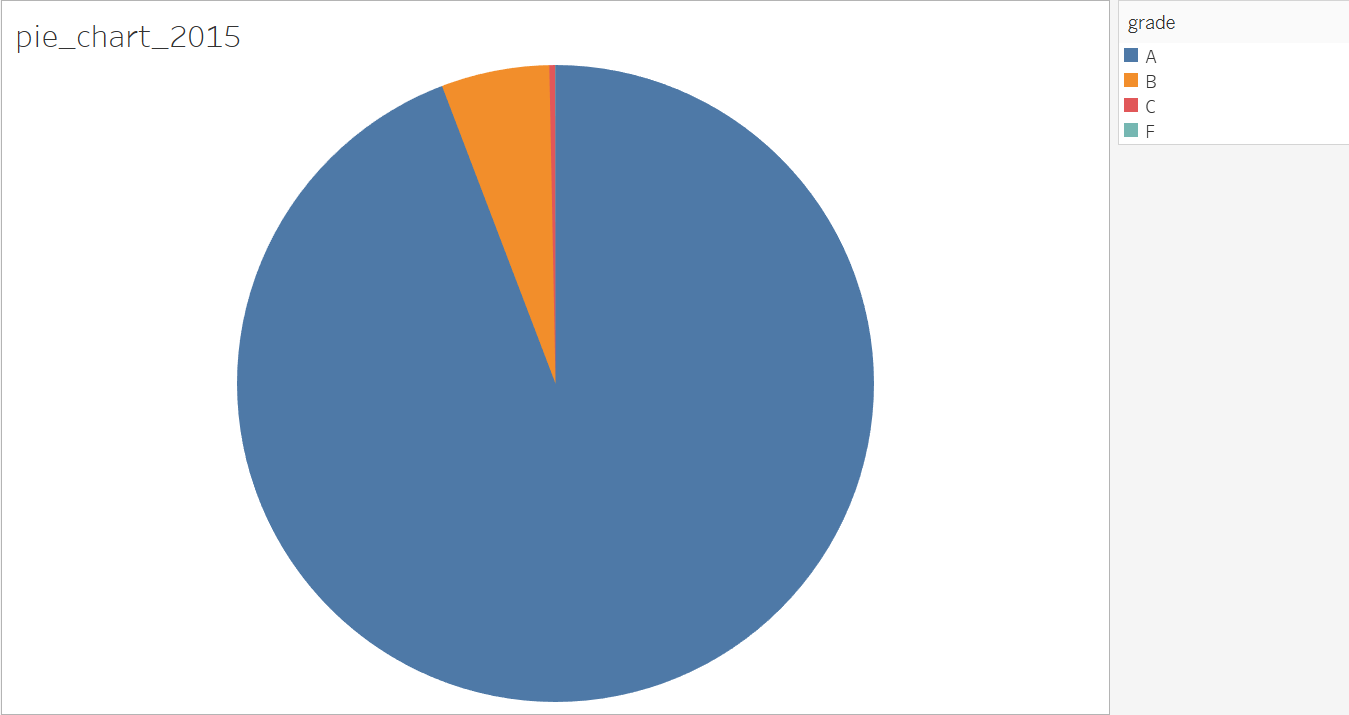

In [127]:
from IPython.display import Image
Image("2015.png")

year 2016

In [ ]:
%%sql
SELECT SUM(CASE WHEN grade = 'A' THEN 1 ELSE 0 END) AS A_2016,
    SUM(CASE WHEN grade = 'B' THEN 1 ELSE 0 END) AS B_2016,
    SUM(CASE WHEN grade = 'C' THEN 1 ELSE 0 END) AS C_2016,
    SUM(CASE WHEN grade = 'F' THEN 1 ELSE 0 END) AS F_2016,
    COUNT(*) AS TOTAL_2016
FROM inspections_facts
JOIN date
on date.key = inspections_facts.date_key
WHERE date.day<'2017-01-01'
AND date.day>'2015-12-31'

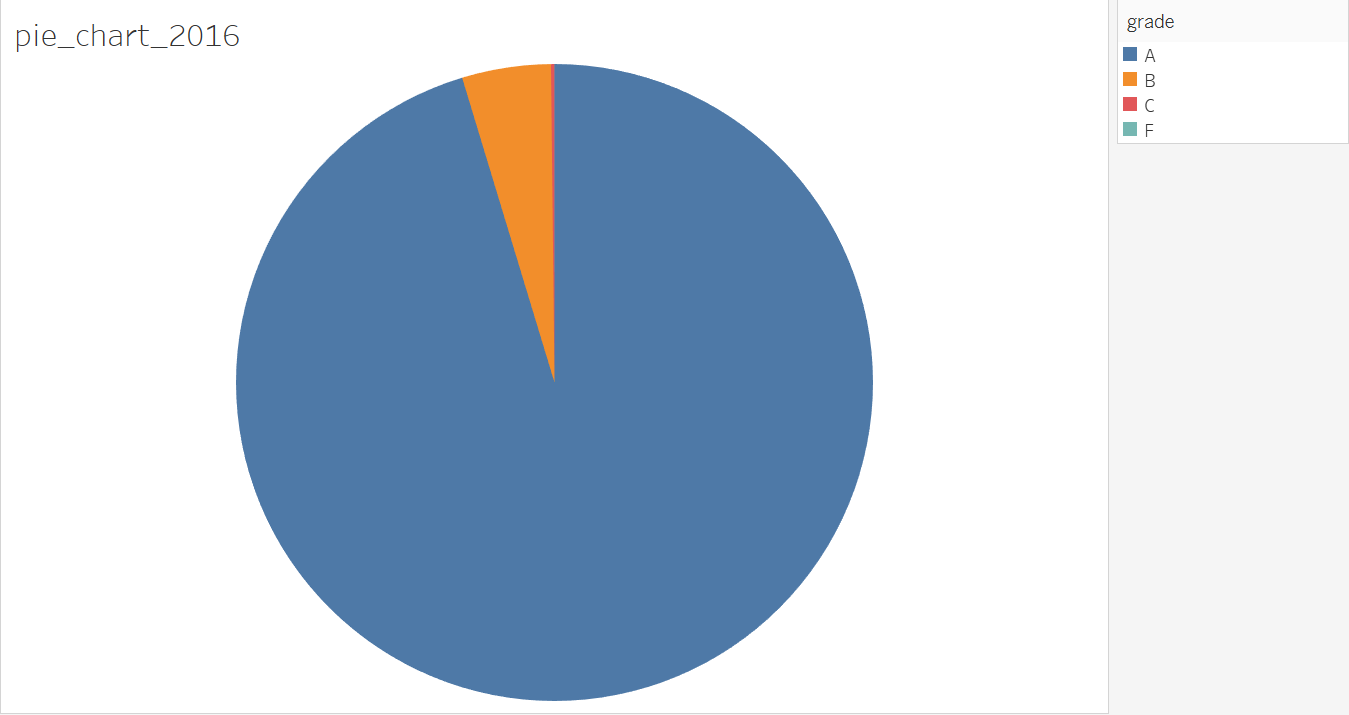

In [126]:
from IPython.display import Image
Image("2016.png")

year 2017

In [ ]:
%%sql
SELECT SUM(CASE WHEN grade = 'A' THEN 1 ELSE 0 END) AS A_2017,
    SUM(CASE WHEN grade = 'B' THEN 1 ELSE 0 END) AS B_2017,
    SUM(CASE WHEN grade = 'C' THEN 1 ELSE 0 END) AS C_2017,
    SUM(CASE WHEN grade = 'F' THEN 1 ELSE 0 END) AS F_2017,
    COUNT(*) AS TOTAL_2017
FROM inspections_facts
JOIN date
on date.key = inspections_facts.date_key
WHERE date.day<'2018-01-01'
AND date.day>'2016-12-31'

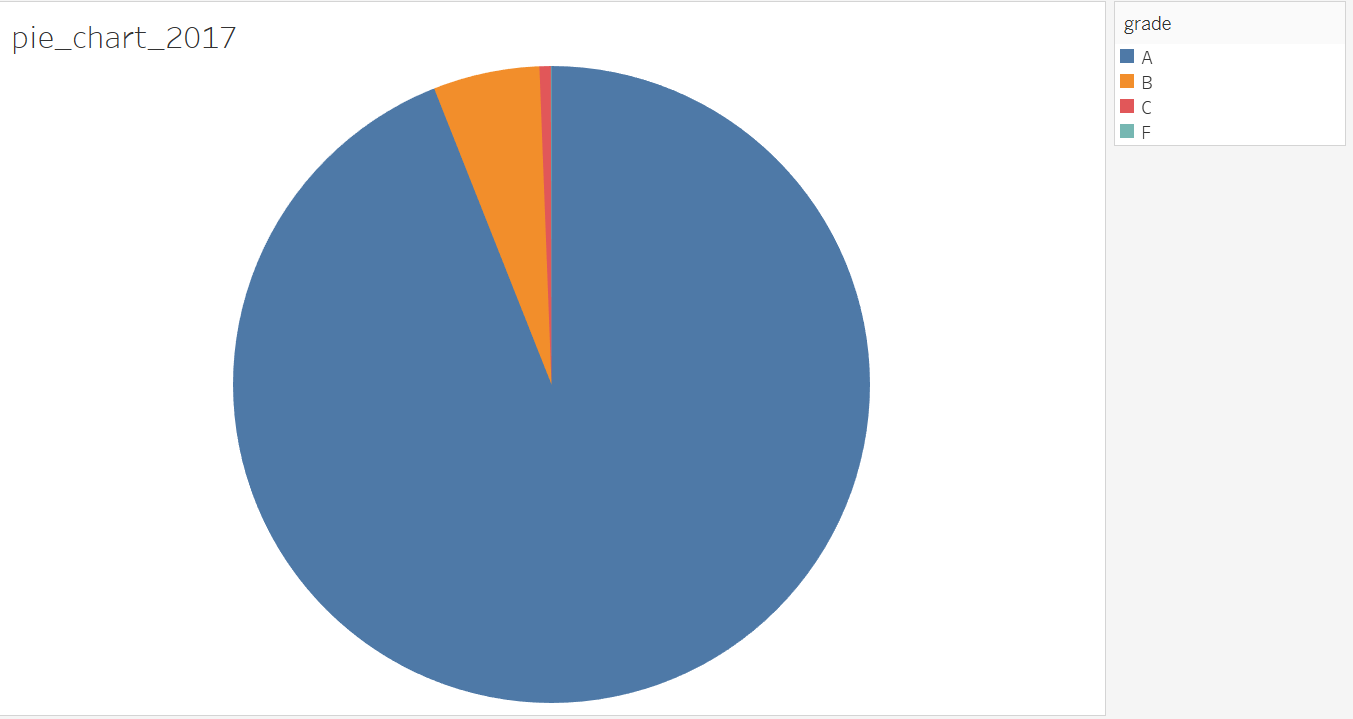

In [125]:
from IPython.display import Image
Image("2017.png")

We could see from 2015 to 2017, the grade A rate rises from 94.2%(2015)to 95.3%(2016), and suddenly falls to 93.9%(2017). The grade B rate decreases from 5.4%(2015) to 4.5%(2016) and recovers to 5.4%(2017). The grade C rate declines from 0.29%(2015) to 0.17%(2016) and then suddenly increases to 0.57%(2017). For those who fail the inspection, the percentage drops from 0.011%(2015) to 0.007%(2016) and increases to 0.034%(2017). The curve of A is U shape and all other grades are reverse.

In conclusion, the restaurants performance is the best in 2016 and faced a sudden drop at 2017 in all four grades. 

**Every month average change**

In [ ]:
%%sql
SELECT date.year, date.month_of_year, ROUND(AVG (inspections_facts.avg_score),4) AS month_avg
FROM inspections_facts
JOIN date 
ON inspections_facts.date_key = date.key
GROUP BY date.year, date.month_of_year
ORDER BY date.year, date.month_of_year;

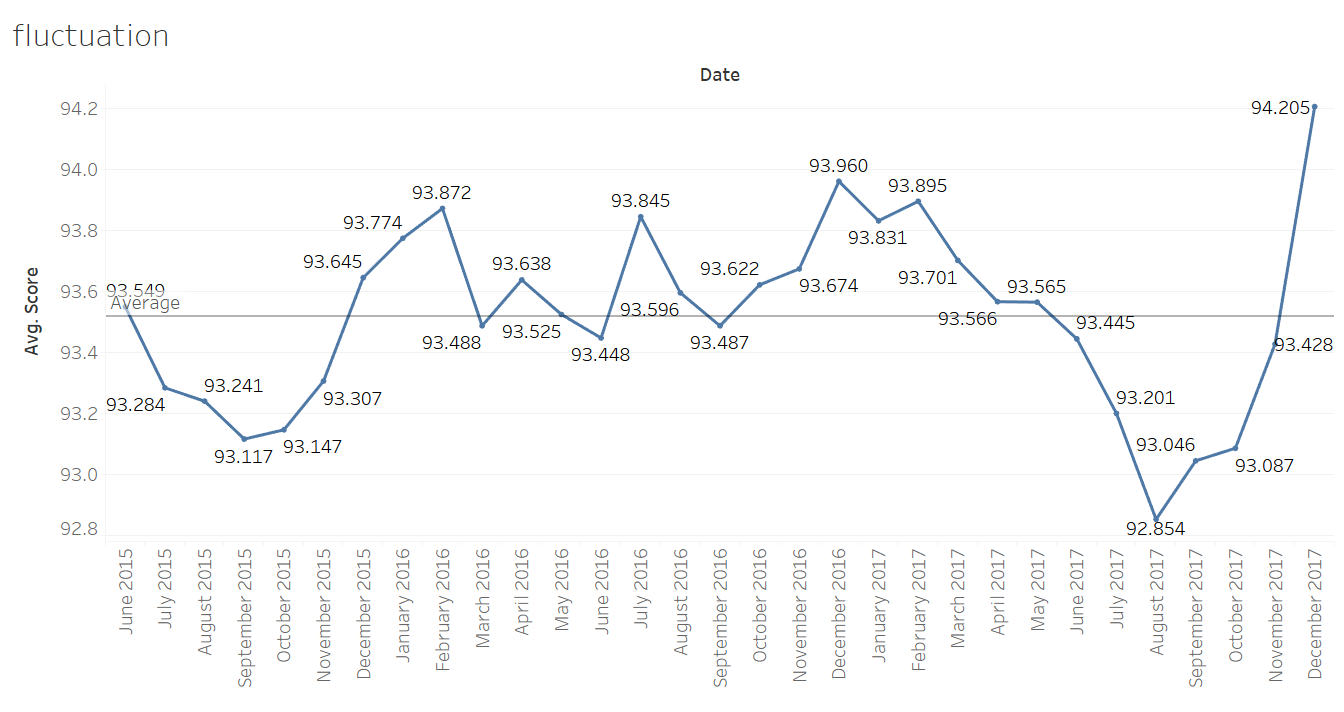

In [128]:
from IPython.display import Image
Image("fluctuation.png")

This fluctuation pattern is more straightforward to see from a line chart.

Nearly all the data at 2016 is above or close to the average line. The score reached a peak at December 2017 and touched the bottom at August 2017. But the peak at December 2017 is meaningless because only first 6 days' data is in this dataset. So, we should consider December 2016 as the real peak. There is a great fluctuation in 2017's record and 2015's record, which has a less fierce shape. In total, score at 2016 is more stable and higher than that of 2015 and 2017.

### Q2:ABOUT VIOLATION

**TOP 10 VIOLATION TYPES**

In [110]:
%%sql
SELECT code, description, COUNT(*) count
FROM violations
JOIN violation_type 
ON violation_type.key = violations.violation_key
GROUP BY code, description
ORDER BY count DESC
LIMIT 10;

10 rows affected.


code,description,count
F033,Standard Not Met: Nonfood-contact surfaces clean and in good repair,73689
F044,"Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean",73275
F035,"Standard Not Met: Equipment/Utensils - approved; installed; clean; good repair, capacity",60793
F036,"Standard Not Met: Equipment, utensils and linens: storage and use",39663
F037,"Standard Not Met: Adequate ventilation and lighting; designated areas, use",37607
F040,"Standard Not Met: Plumbing: Plumbing in good repair, proper backflow devices",37498
F007,Standard Not Met: Proper hot and cold holding temperatures,33242
F030,Standard Not Met: Food properly stored; food storage containers identified,29813
F043,Standard Not Met: Premises; personal/cleaning items; vermin-proofing,29470
F039,Standard Not Met: Wiping cloths: properly used and stored,29082


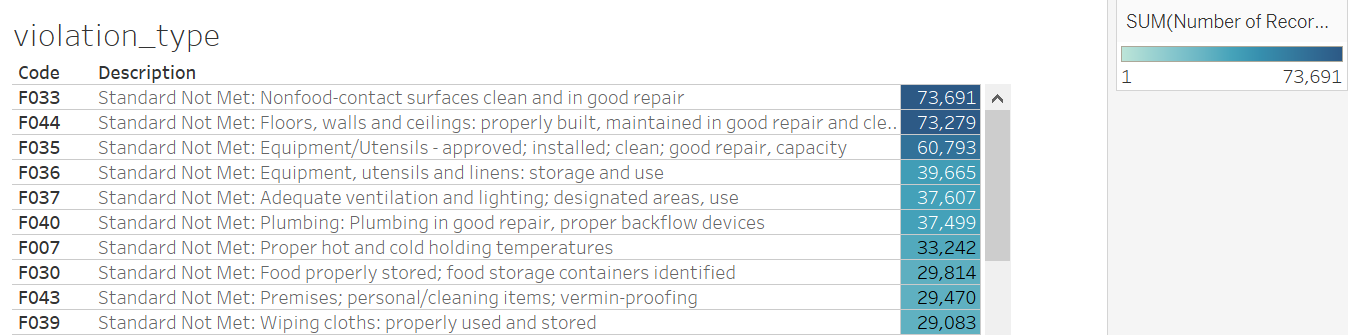

In [129]:
from IPython.display import Image
Image("hist.png")

This is a general statistics of violation type. The most frequent being violated standard is 'Nonfood-contact surfaces clean and in good repair'. However, we want to dig deeper into whether the high count number is due to a fraction of restaurant constantly violate this or a common phenomenon.

In [111]:
%%sql
SELECT business.business_key, business.name, date.day, violations.inspection_key, violations.violation_key
FROM inspections_facts
JOIN date
ON date.key = inspections_facts.date_key
JOIN business
ON inspections_facts.business_key = business.business_key
JOIN violations
ON violations.inspection_key = inspections_facts.inspection_key
ORDER BY business_key, day, violation_key
LIMIT 100

100 rows affected.


business_key,name,day,inspection_key,violation_key
1,JOSYLN SENIOR CENTER,2016-12-21,92497,6
1,JOSYLN SENIOR CENTER,2016-12-21,92497,69
2,STARBUCKS COFFEE #9685,2016-01-06,71169,22
2,STARBUCKS COFFEE #9685,2016-01-06,71169,39
2,STARBUCKS COFFEE #9685,2017-01-18,109102,6
2,STARBUCKS COFFEE #9685,2017-01-18,109102,11
2,STARBUCKS COFFEE #9685,2017-01-18,109102,35
3,VFW POST NO. 6110,2015-09-10,86423,6
3,VFW POST NO. 6110,2015-09-10,86423,22
3,VFW POST NO. 6110,2015-09-10,86423,39


The cell above shows the violation types that each restaurant has ever violated. After roughly looking at the result, we notice that some violation types are quite common among different restaurants and some restaurants are found violating the same type continously. So we house the result above in a table called "common" to check these phenomenons in details.

In [112]:
%%sql
DROP TABLE IF EXISTS common;

CREATE TABLE common(
business_key INT NOT NULL,
name VARCHAR(100),
date VARCHAR(100),
inspection_key INT,
violation_key INT)

Done.
Done.


[]

In [113]:
%%sql
INSERT INTO common(business_key, name, date, inspection_key, violation_key)
SELECT business.business_key, business.name, date.day, violations.inspection_key, violations.violation_key
FROM inspections_facts
JOIN date
ON date.key = inspections_facts.date_key
JOIN business
ON inspections_facts.business_key = business.business_key
JOIN violations
ON violations.inspection_key = inspections_facts.inspection_key
ORDER BY business_key, day, violation_key

670410 rows affected.


[]

In [114]:
%%sql
SELECT * FROM common 
LIMIT 10

10 rows affected.


business_key,name,date,inspection_key,violation_key
1,JOSYLN SENIOR CENTER,2016-12-21,92497,6
1,JOSYLN SENIOR CENTER,2016-12-21,92497,69
2,STARBUCKS COFFEE #9685,2016-01-06,71169,22
2,STARBUCKS COFFEE #9685,2016-01-06,71169,39
2,STARBUCKS COFFEE #9685,2017-01-18,109102,6
2,STARBUCKS COFFEE #9685,2017-01-18,109102,11
2,STARBUCKS COFFEE #9685,2017-01-18,109102,35
3,VFW POST NO. 6110,2015-09-10,86423,6
3,VFW POST NO. 6110,2015-09-10,86423,22
3,VFW POST NO. 6110,2015-09-10,86423,39


The result below shows the top10 restaurants that keep violating one certain regulation for the most times. For example, the restaurant called KAISHIN MALIBU was inspected to have violated the no.69 violation type 10 times. And we notice that there are many restaurants keeping violating the violation_key 58 and 39, so these types might be the most prevalent ones.

In [115]:
%%sql
SELECT common.business_key, name, violation_key, COUNT(*)
FROM common
GROUP BY common.business_key, name, violation_key
ORDER BY count DESC, violation_key DESC
LIMIT 50

50 rows affected.


business_key,name,violation_key,count
17707,KAISHIN MALIBU,69,10
25630,BAJA CALIFORNIA BAR AND GRILL,58,10
18652,TACOS CHIHUAHUA,58,10
25693,EL COMPADRE RESTAURANT,39,10
27953,STADIUM CLUB,39,10
25630,BAJA CALIFORNIA BAR AND GRILL,6,10
12165,A & A CHINESE FOOD,58,9
25210,RACHANDA THAI CUISINE,58,9
25526,PING PONG CHINESE CUISINE,58,9
19232,PEPPONE,58,9


In order to draw a more solid conclusion, we create a table called "inspection_count" to house the data that displays how many times each restaurant is inspected. 

In [116]:
%%sql
DROP TABLE IF EXISTS inspection_count;

CREATE TABLE inspection_count(
business_key INT NOT NULL,
name VARCHAR(100) NOT NULL,
count INT)

Done.
Done.


[]

In [117]:
%%sql
INSERT INTO inspection_count(business_key, name, count)
SELECT inspections_facts.business_key, name, COUNT(*)
FROM inspections_facts
JOIN business
ON business.business_key = inspections_facts.business_key
GROUP BY inspections_facts.business_key, business.name
ORDER BY inspections_facts.business_key

28377 rows affected.


[]

In [118]:
%%sql
SELECT COUNT(*)
FROM (SELECT DISTINCT business_key FROM inspections_facts) AS dis

1 rows affected.


count
28377


The number of rows affected and the number of distinct business_key in inspections_facts table match, so every business that appears in the inspections_facts table has been assigned a inspection count. Then we can join the table "common" and table "inpection_count", so that we can compare the number of times one certain restaurant violated one certain type and the number of time it has been inspected in total.

In [119]:
%%sql
SELECT common.business_key, common.name, violation_key, COUNT(*), inspection_count.count AS total
FROM common
JOIN inspection_count
ON common.business_key =  inspection_count.business_key
GROUP BY common.business_key, common.name, violation_key, total
ORDER BY count DESC, violation_key DESC
LIMIT 50

50 rows affected.


business_key,name,violation_key,count,total
17707,KAISHIN MALIBU,69,10,11
25630,BAJA CALIFORNIA BAR AND GRILL,58,10,10
18652,TACOS CHIHUAHUA,58,10,10
25693,EL COMPADRE RESTAURANT,39,10,10
27953,STADIUM CLUB,39,10,10
25630,BAJA CALIFORNIA BAR AND GRILL,6,10,10
12165,A & A CHINESE FOOD,58,9,9
25210,RACHANDA THAI CUISINE,58,9,9
25526,PING PONG CHINESE CUISINE,58,9,9
19232,PEPPONE,58,9,9


Looking at the result above roughly, we notice that there are many restaurants violating one certain standard every time when they were inspected. So, next we want to find out the top3 standards with the largest number of restaurants violating it every time when inspected. 

In [120]:
%%sql
SELECT COUNT(*) AS count, violation_key, violation_type.code, violation_type.description
FROM (SELECT common.business_key, common.name, violation_key, COUNT(*), inspection_count.count AS total
      FROM common
      JOIN inspection_count
      ON common.business_key =  inspection_count.business_key
      GROUP BY common.business_key, common.name, violation_key, total
      ORDER BY count DESC, violation_key DESC) AS prevalent
JOIN violation_type
ON violation_key = violation_type.key
WHERE count = total
GROUP BY violation_key, violation_type.code, violation_type.description
ORDER BY count DESC
LIMIT 3;

3 rows affected.


count,violation_key,code,description
4296,39,F044,"Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean"
3953,58,F033,Standard Not Met: Nonfood-contact surfaces clean and in good repair
2259,6,F035,"Standard Not Met: Equipment/Utensils - approved; installed; clean; good repair, capacity"


In [121]:
%%sql
SELECT COUNT(*) FROM business

1 rows affected.


count
28771


The total number of restaurants is 28771. From the results above we can see that, for the F044 standard, 4296 out of 28771,which is nearly 15%, restaurants in LA county were found not meeting this standard every time when they were inspected.

Similarly, we can also find out the top3 standards with the largest number of restaurants violating it for at least one time in any inspection.

In [122]:
%%sql
SELECT COUNT(*) AS count, violation_key, violation_type.code, violation_type.description
FROM (SELECT common.business_key, common.name, violation_key, COUNT(*), inspection_count.count AS total
      FROM common
      JOIN inspection_count
      ON common.business_key =  inspection_count.business_key
      GROUP BY common.business_key, common.name, violation_key, total
      ORDER BY count DESC, violation_key DESC) AS serious
JOIN violation_type
ON violation_key = violation_type.key
WHERE count >= '1'
GROUP BY violation_key, violation_type.code, violation_type.description
ORDER BY count DESC
LIMIT 3;

3 rows affected.


count,violation_key,code,description
23785,39,F044,"Standard Not Met: Floors, walls and ceilings: properly built, maintained in good repair and clean"
23555,58,F033,Standard Not Met: Nonfood-contact surfaces clean and in good repair
22403,6,F035,"Standard Not Met: Equipment/Utensils - approved; installed; clean; good repair, capacity"


As shown in the result, these three standard are the same as those standards with the largest number of restaurants violating it every time when inspected. So, we can conclude that these are the most prevalent violation types. To be more percise, for the standard F044, 23785 out of 28771, which is 82.67%, restaurants in LA county violated this standard for at least one time, and nearly 15% of the restaurants violated this standard every time when inspected.

As for the reason behind this, we think that the punishment to these three types of violations is not strong enough, or it might be too costly for restaurants to meet these standards. So, the regulators might want to provide the restaurants with more incentives to fix these problem, so that the general health and sanitation level of restaurants in LA county would increase greatly.

## Bonus - Augment

We try to find the connection between the property value and inspection score in LA County. Therefore, we find data about assessed property values from this website: http://us-city.census.okfn.org/entry/losangeles/assessment.

In [ ]:
!wget -O a1.csv https://data.lacounty.gov/api/views/7rjj-f2pv/rows.csv?accessType=DOWNLOAD

In [ ]:
!head -n 100 a1.csv| csvstat

We can see there are many columns in this dataset and it is a very large file. Therefore, we decide to handle this dataset with command line.

In [ ]:
!xsv index a1.csv

In [ ]:
!ls -lh a1*

In [ ]:
!xsv sort -s1 a1.csv > sort1.csv

After sorted it, we copy it to a file named sort1.csv

In [ ]:
!head sort1.csv | xsv table

In [ ]:
!xsv index businesses2.csv

We process business2.csv in the same way.

In [ ]:
!head businesses2.csv | xsv table

In [ ]:
!xsv sort -s6 businesses2.csv > sort2.csv

After sorted the businesses2.csv, we copy it to a file called sort2.csv.

In [ ]:
!xsv join ZIPcode sort1.csv postal_code sort2.csv > sort3.csv

We use conmand line to join both files on zip code and copy outcome to a file called sort3.csv.

In [ ]:
!head sort3.csv | xsv table

In [ ]:
!head inspections.csv | xsv table

In [ ]:
!xsv index inspections.csv

In [ ]:
!xsv sort -s5 inspections.csv > sort4.csv

After created the index for inspections.csv, we copy it to sort4.csv.

In [ ]:
!head sort4.csv | xsv table

In [ ]:
!xsv join business_id sort3.csv business_id sort4.csv > sort5.csv

We also join sort3.csv and sort4.csv on business_id and save the outcome in sort5.csv.

In [ ]:
!head sort5.csv | xsv table

In [ ]:
!xsv select ZIPcode,TotalValue,score sort5.csv > merge.csv

We select only zipcode, property value and inspection scores columns and save them in merge.csv.

In [ ]:
!head -n 100 merge.csv| csvstat

From the above cell, we can see that the total value contains punctuation and it is string. Thus, we use "sed" to remove punctuation in the next cell.

In [ ]:
!sed  's|[$]||g' merge.csv > merge1.csv

In [ ]:
!head -n 100 merge1.csv| csvstat

In [ ]:
!xsv count merge1.csv

After handled this dataset, we decided to load it to sql to further explore it.

In [ ]:
%%sql
DROP TABLE IF EXISTS property;

CREATE TABLE property (
    postal_code VARCHAR(200) NOT NULL,
    TotalValue NUMERIC,
    score NUMERIC
);

In [ ]:
!cp merge1.csv /tmp/p1.csv

In [ ]:
%%sql
COPY property FROM '/tmp/p1.csv'
CSV
HEADER;

The count in sql is the same with the xsv count.

In [ ]:
%%sql
select * from property
limit 10;

We want to see the relationship between the average property value and score with the same zip code, so we group by the zip code and take average on property value and score.

In [ ]:
%%sql
select postal_code, avg(totalvalue) AS avg_totalvalue, avg(score) AS avg_score
from property
group by postal_code
order by avg_totalvalue DESC, avg_score DESC
limit 10

To see this outcome clearly, we visualize the outcome on Tableau.

In [ ]:
from IPython.display import Image
Image("tab.png")

The map on the left side is the average property value and the higher the price, the redder it is. The lower the price, the bluer it is. 
The map on the right side is the inspection average score. The redder it is, the higher the score. On the contrary, the bluer it is, the lower the score.
We can see where the property value is higher, the score in most of those places are below the average. On the contrary, the property value of the places with higher score is actual low. We guess that those restaurants located in high value places have to pay more on their rents and thus pay less on maintain restaurants' healthy environment.